In [1]:
import plotly.express as px
import os
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import load_json
from collections import defaultdict
from data_selection.data_selection_utils import float_floor

from consistency import (
    dnli_human_bucket_predictions,
    dnli_test_set_predictions,
    anli_human_bucket_predictions,
    anli_test_set_predictions,
    construct_bucket_metadata,
    get_original_example_prediction_accuracy,
    calculate_weighted_consistency,
    get_consistencies
)

In [2]:
buckets = construct_bucket_metadata(dnli_human_bucket_predictions['snli']['specialized_roberta'], model_name='specialized_roberta')

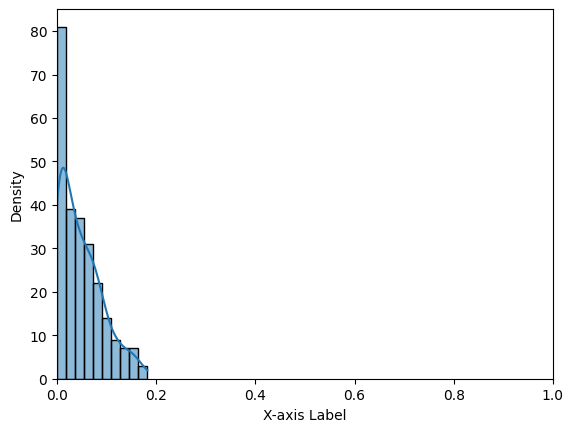

In [3]:
sns.histplot(buckets.bucket_confidence_var, kde=True)

# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Density')

plt.xlim(0, 1)

# Show the plot
plt.show()

In [4]:
ground_truth = buckets.gold_label.to_numpy()
confidences = buckets.original_confidence.to_numpy()

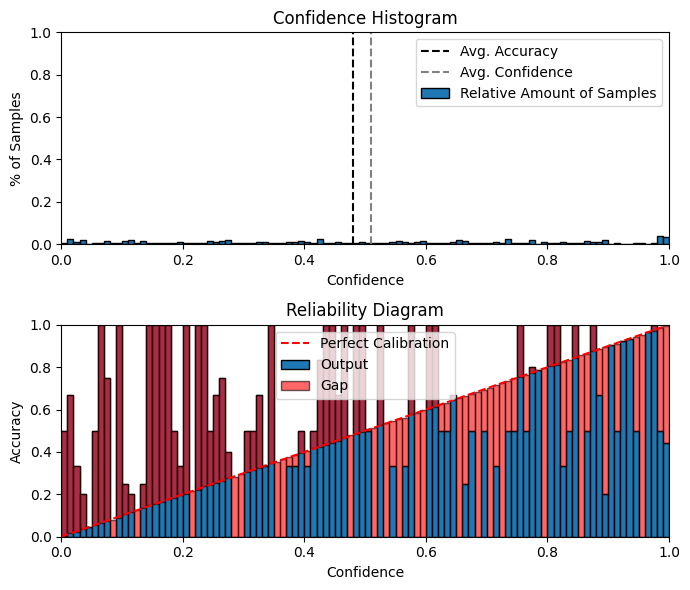

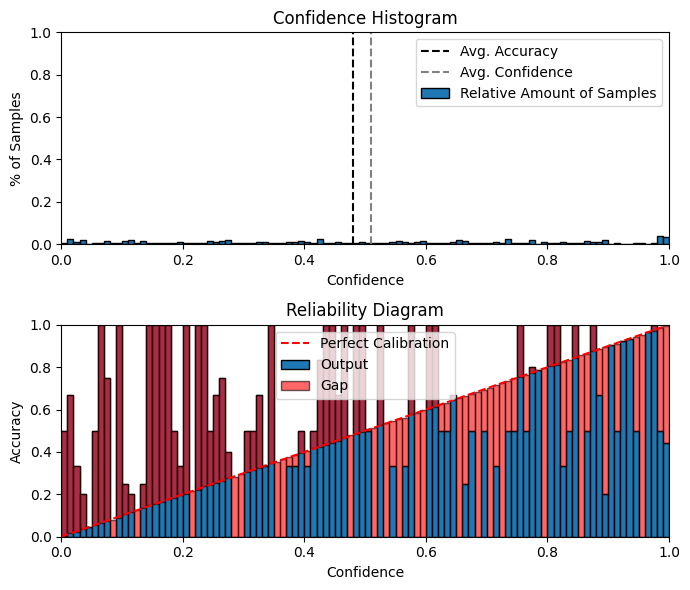

In [5]:
from netcal.presentation import ReliabilityDiagram

n_bins = 100

diagram = ReliabilityDiagram(n_bins)
diagram.plot(confidences, ground_truth)  # visualize miscalibration of uncalibrated confidences

In [6]:
from netcal.metrics import ECE

n_bins = 100

ece = ECE(n_bins)
uncalibrated_score = ece.measure(confidences, ground_truth)

In [7]:
uncalibrated_score

0.3769396324986592

<Axes: xlabel='original_confidence', ylabel='bucket_confidence_var'>

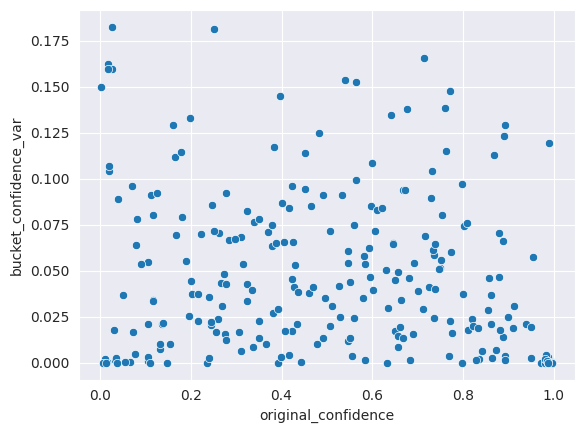

In [13]:
import seaborn as sns
sns.set_style("darkgrid")


sns.scatterplot(x=buckets.original_confidence, y=buckets.bucket_confidence_var)


In [12]:
buckets

,bucket_predictions,bucket_confidence_distribution,bucket_confidence_mean,bucket_confidence_var,bucket_confidence_std,original_confidence,bucket_consistency,conf_shift,orig_pred_shift,example_id,model_name,gold_label,original_prediction
0,"[1, 0, 1, 0]","[0.5437316298484802, 0.21851086616516113, 0.50...",0.434280,0.016268,0.127546,0.775804,0.500000,-0.341524,0.275804,snli.train.60271,RoBERTa-large,1,1
1,"[0, 0, 0, 0, 0, 1, 1, 1]","[0.46322277188301086, 0.1330977827310562, 0.09...",0.404994,0.111550,0.333991,0.165052,0.625000,0.239942,0.334948,snli.train.27833,RoBERTa-large,1,0
2,"[0, 1, 0, 1, 1, 1]","[0.8040749430656433, 0.13813011348247528, 0.64...",0.373736,0.077931,0.279162,0.080842,0.666667,0.292894,0.419158,snli.train.48832,RoBERTa-large,0,1
3,"[0, 0, 0, 0, 1, 0]","[0.8421984314918518, 0.7902429699897766, 0.621...",0.627811,0.036954,0.192235,0.862314,0.833333,-0.234502,0.362314,snli.train.37372,RoBERTa-large,0,0
4,"[1, 1, 0, 1, 0, 0]","[0.22409600019454956, 0.06903407722711563, 0.5...",0.381858,0.060079,0.245110,0.773588,0.500000,-0.391729,0.273588,snli.train.81944,RoBERTa-large,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"[1, 0, 0, 0, 0, 0, 1, 1, 1]","[0.3202205300331116, 0.9558206796646118, 0.977...",0.607304,0.153331,0.391574,0.539919,0.555556,0.067386,0.039919,snli.train.16716,RoBERTa-large,0,0
246,"[1, 1, 1, 1, 1, 1]","[0.9387601613998413, 0.6020211577415466, 0.730...",0.800345,0.019046,0.138009,0.832591,1.000000,-0.032245,0.332591,snli.train.48321,RoBERTa-large,1,1
247,"[1, 0, 0, 1, 1, 1, 1, 1]","[0.13512268662452698, 0.7014356255531311, 0.83...",0.243521,0.093643,0.306011,0.671871,0.250000,-0.428350,0.171871,snli.train.18322,RoBERTa-large,0,0
248,"[1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.9914443492889404, 0.9862492680549622, 0.987...",0.987014,0.000009,0.003031,0.987169,1.000000,-0.000155,0.487169,snli.train.18321,RoBERTa-large,1,1


In [11]:
conf = lambda row: row.original_confidence if row.original_prediction == row.gold_label else 1 - 

SyntaxError: invalid syntax (2595260983.py, line 1)